In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
#using low memory flag to load columns with multiple data types.
df = pd.read_csv('loan.csv', low_memory=False)

#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [68]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [69]:
df.shape

(39717, 111)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [72]:
#drop columns where more than 30% values are null
allVals = round(100*df.isnull().mean(),2)
drop_clos2 = allVals[allVals >30].index
df=df.drop(drop_clos2,axis=1)

In [74]:
#drop rows where 60 or more values are null
df=df.dropna(thresh=df.shape[1]-60, axis=0)

In [76]:
#drop columns where 75% of values are NaN
perc = 75.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, thresh=min_count)

In [77]:
#Finding number of unique values in each vcolumn
df.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [78]:
#Dropping Columns with only one values.
df.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [79]:
#Finding number of unique values, printing high unique valued columns
df.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

In [80]:
#Finding percentage of null or missing values
null_perc = round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc[ null_perc > 0 ]

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

In [81]:
df.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(df.index)), 2)
null_perc[ null_perc > 0 ]

emp_title                          6.49
emp_length                         2.84
desc                              34.14
title                              0.03
mths_since_last_delinq            67.77
mths_since_last_record            97.45
revol_util                         0.13
last_pymnt_d                       0.19
next_pymnt_d                     101.79
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.15
mths_since_last_major_derog      104.80
annual_inc_joint                 104.80
dti_joint                        104.80
verification_status_joint        104.80
tot_coll_amt                     104.80
tot_cur_bal                      104.80
open_acc_6m                      104.80
open_il_6m                       104.80
open_il_12m                      104.80
open_il_24m                      104.80
mths_since_rcnt_il               104.80
total_bal_il                     104.80
il_util                          104.80
open_rv_12m                      104.80


In [83]:
#Finding number of unique values in each vcolumn
df.nunique().sort_values().head(50)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     81
last_credit_pull_d            97
last_pymnt_d                  97
int_rate                     337
earliest_cr_line             514
zip_code                     809
loan_amnt                    869
funded_amnt                 1031
revol_util                  1087
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1274
collection_recovery_fee     2506
dti                         2863
recoveries                  3827
annual_inc

In [84]:
#Stripping empty space in values in term
df['term'] = df.term.str.strip()
df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [85]:
# Finding datatype in all coulmns
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [86]:
# Remove '%' from the int_rate column
df['int_rate'] = df['int_rate'].str.replace('%', '')

In [87]:
# Remove '%' from the revol_util column
df['revol_util'] = df['revol_util'].str.replace('%', '')

In [88]:
#converting to date type
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
df['issue_d'] = df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [89]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [90]:
#issue_d column
df['issue_d_year'] = df.issue_d.dt.year
df['issue_d_month'] = df.issue_d.dt.strftime('%b')
df['issue_d_weekday'] = df.issue_d.dt.weekday
#df type conversion of year and weekday
df['issue_d_year'] = df['issue_d_year'].astype(object)
df['issue_d_weekday'] = df['issue_d_weekday'].astype(object)

#earliest_cr_line
df['earliest_cr_line_year'] = df.earliest_cr_line.dt.year
df['earliest_cr_line_month'] = df.earliest_cr_line.dt.strftime('%b')
#df type conversion of year and weekday
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype(object)

In [91]:
df['approved_loan_amnt_ratio'] = round(df.funded_amnt_inv*100/df.loan_amnt,2)

### Univariate analysis

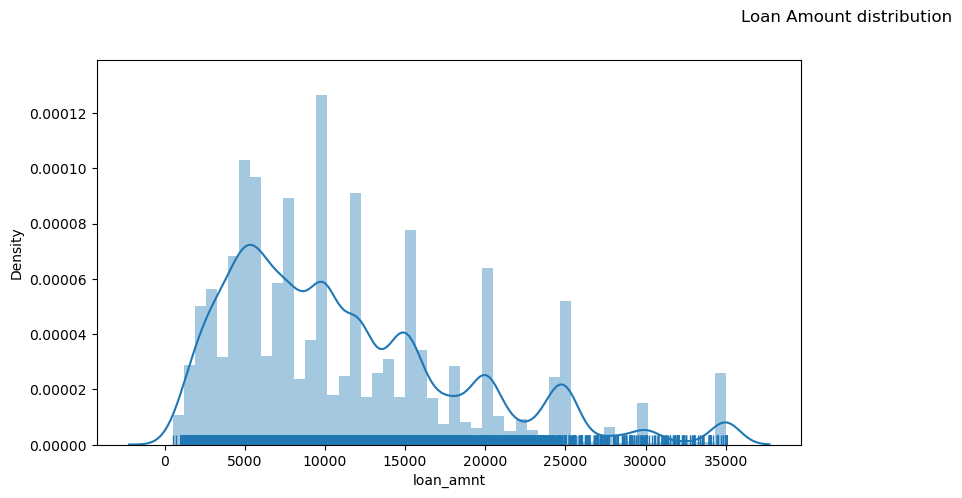

In [106]:
#Increasing the figure size of plot
plt.figure(figsize=(20,5))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=df.loan_amnt, rug=True)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [94]:
#Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   39717.00
mean    11219.44
std      7456.67
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

##### Observations:
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

#### Approved Loan Amount Ratio

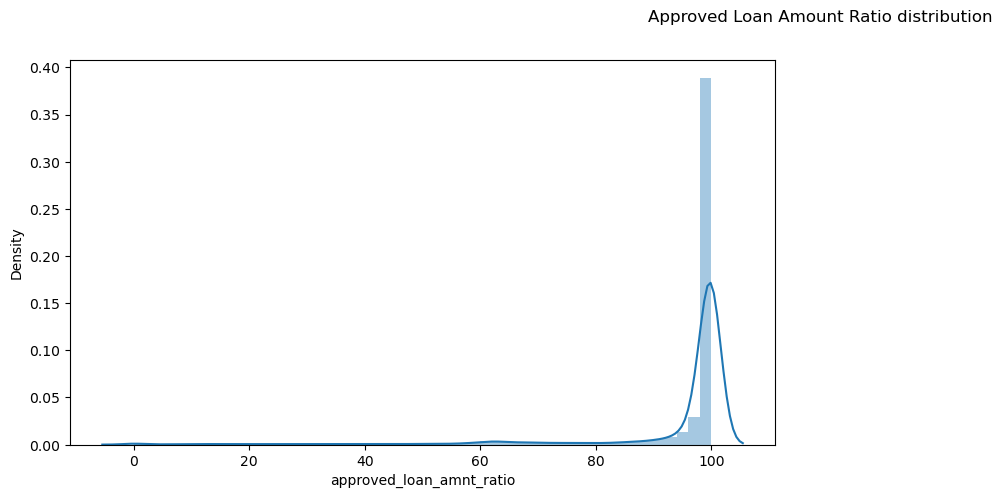

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=df.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

##### Observations: 70% of Borrowers got 100% loan amount from investors.

#### Interest Rate

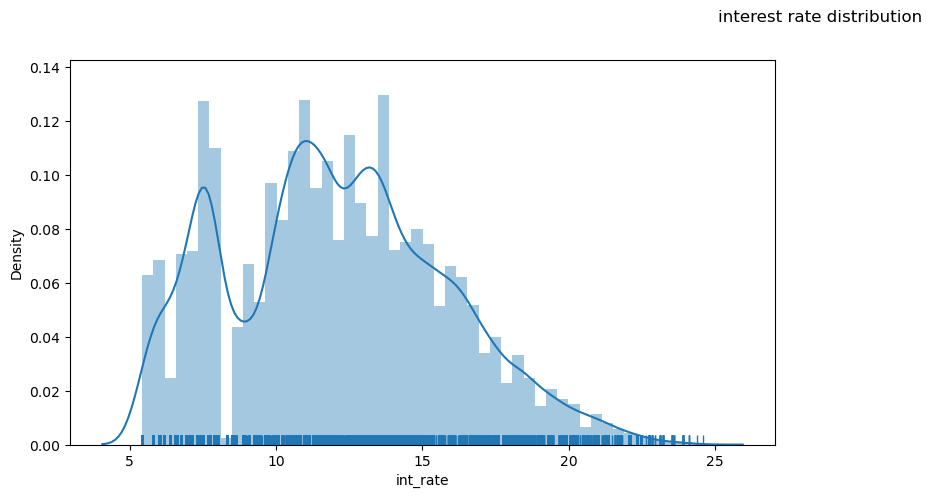

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=df.int_rate, rug=True)
plt.suptitle('interest rate distribution')
plt.show()

Observations:
Most of the interest rates lies between 9% to 14.5%. Some people took loan at higher rates of interest i.e., 22.5%

#### Installment
The monthly payment owed by the borrower if the loan originates.

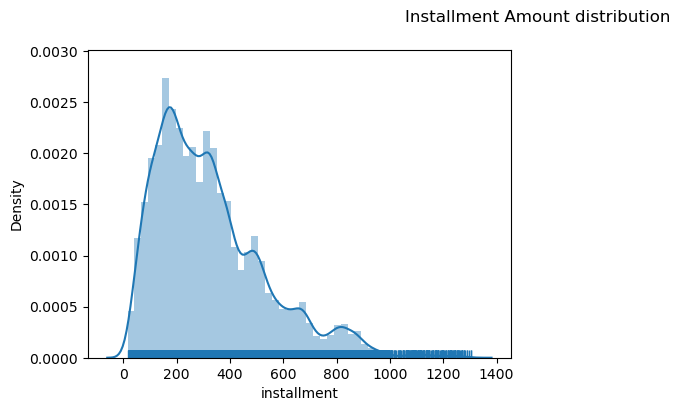

In [107]:
installment = df.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.suptitle('Installment Amount distribution')
plt.show()

Observations:
The Most representative value of Installment amount in around 280.

#### Grade

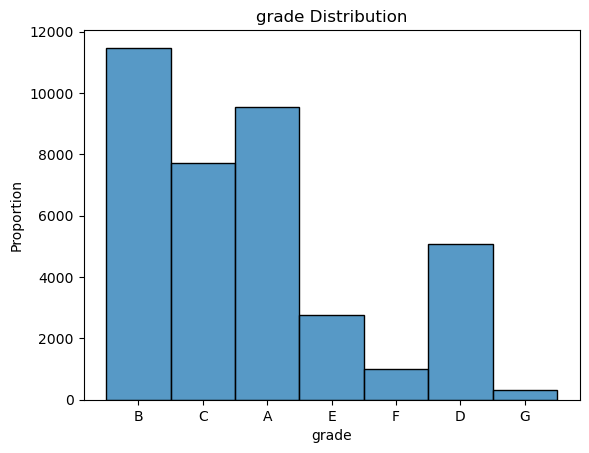

In [111]:
var = 'grade'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()
sns.histplot(x=df[var])
#sns.barplot(x='index', y=var, df=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:
Most borrowers fall under A and B grades then other grades

#### Employment length

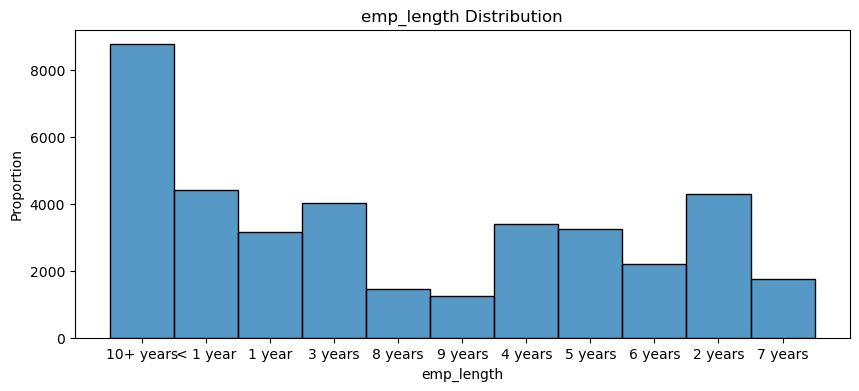

In [112]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()
sns.histplot(x=df[var])
#sns.barplot(x='index', y=var, df=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:
Borrowers are mostly 10+ years emploment length.

#### Home Ownership

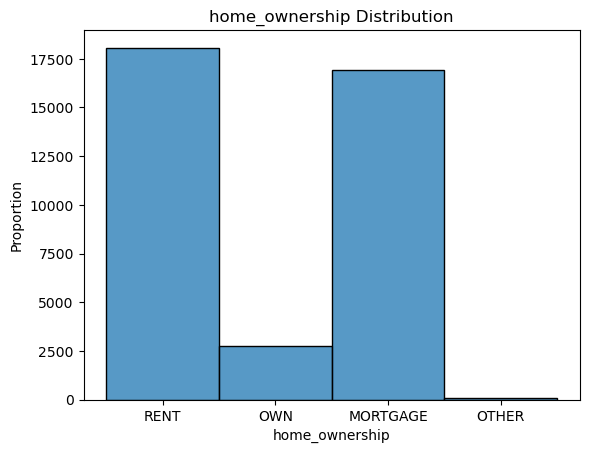

In [113]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = df[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.histplot(x=df[var])
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

Observations:
The loan borrowers are mostly having rented and mortgage houses.

#### Segmented Univariate Analysis

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

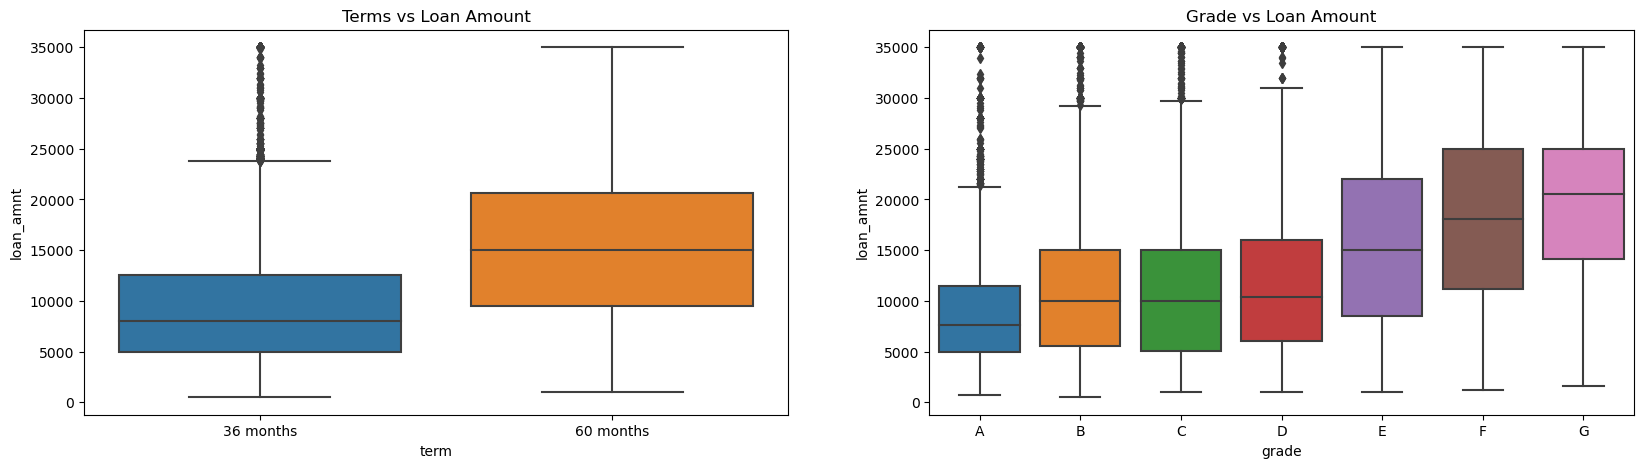

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=df.loan_amnt, data=df)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=df.loan_amnt, order = grade_ord, data=df)

Observations:
Higher amount loans have high tenure i.e, 60 months.
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

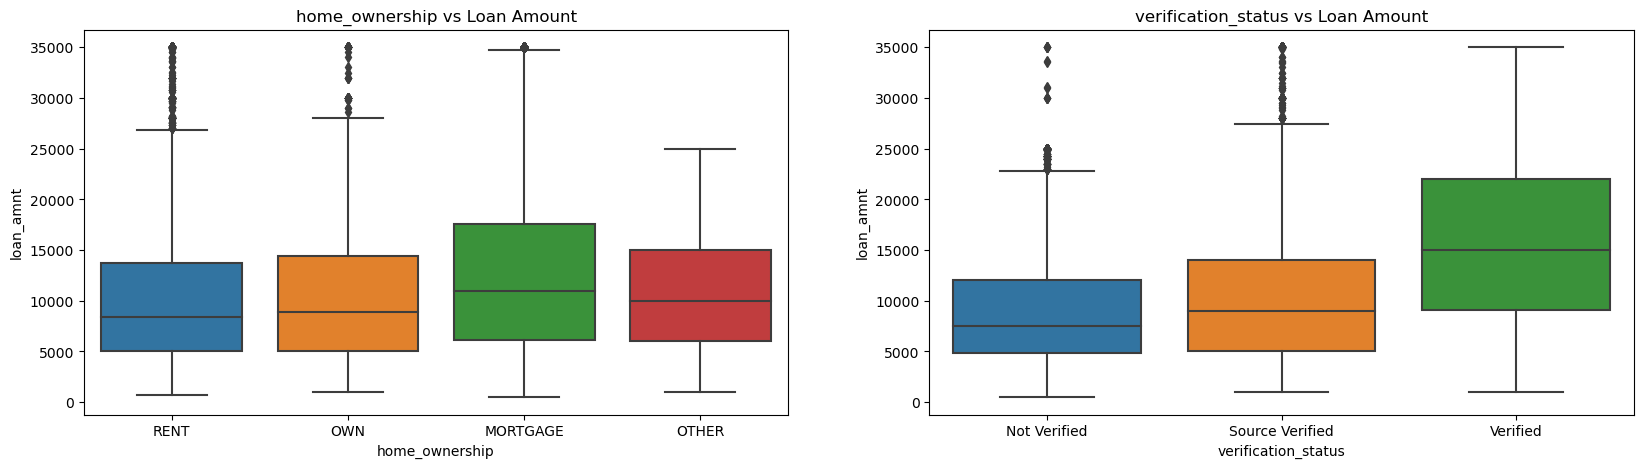

In [116]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=df.loan_amnt, data=df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=df.loan_amnt, order = verification_status_ord, data=df)

Observations:
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9k

### Additional chart only analysis

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

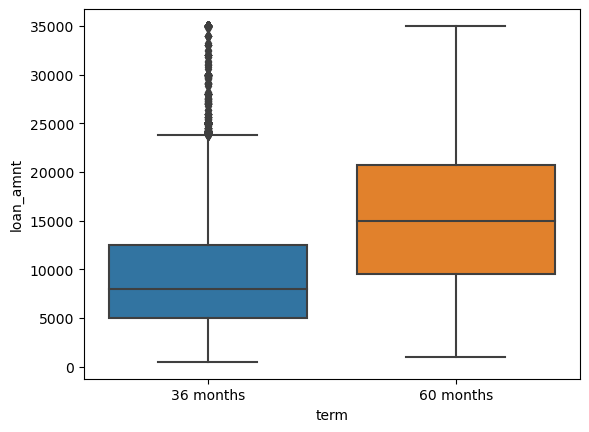

In [118]:
sns.boxplot(x=df["term"],y=df["loan_amnt"])

<AxesSubplot:xlabel='term', ylabel='funded_amnt'>

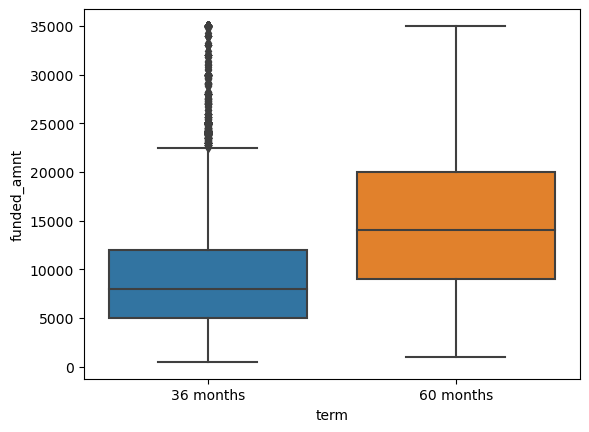

In [119]:
sns.boxplot(x=df["term"],y=df["funded_amnt"])

<AxesSubplot:>

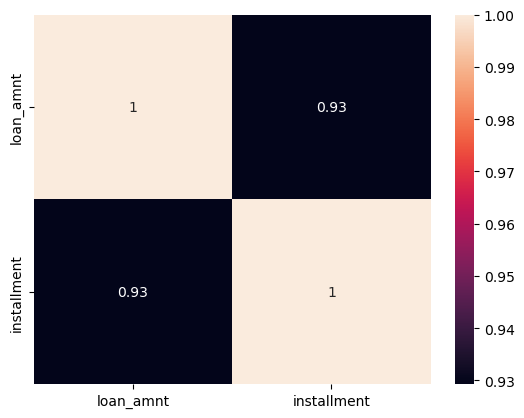

In [120]:
sns.heatmap(df[["loan_amnt","installment"]].corr(),annot=True)

<AxesSubplot:>

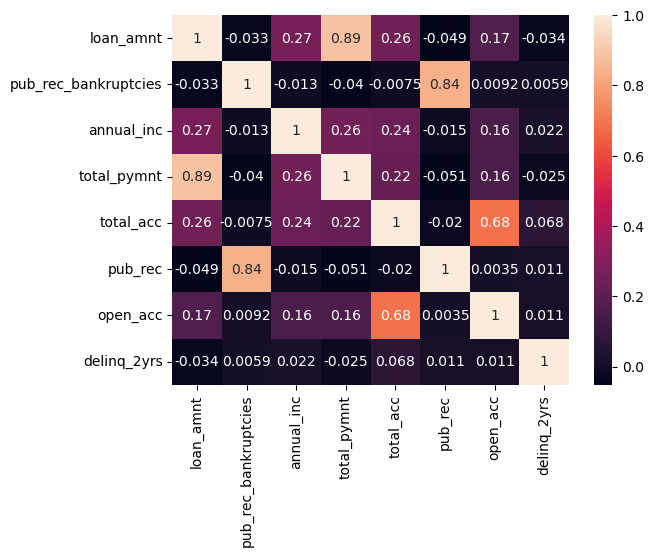

In [121]:
sns.heatmap(df[["loan_amnt","pub_rec_bankruptcies","annual_inc","total_pymnt","total_acc","pub_rec","open_acc","delinq_2yrs"]].corr(),annot=True)

<AxesSubplot:xlabel='home_ownership', ylabel='open_acc'>

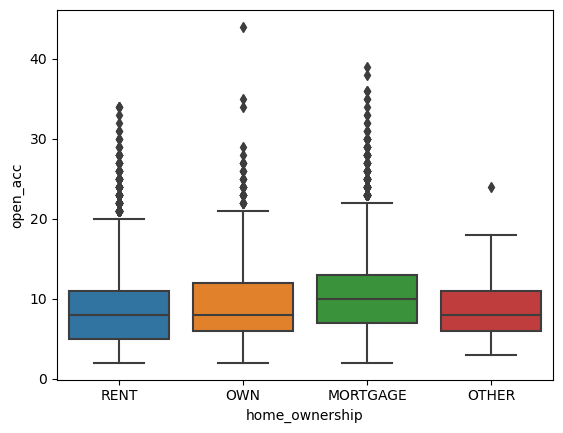

In [122]:
sns.boxplot(x=df["home_ownership"],y=df["open_acc"])